# Project : Book rating prediction model

## Packages used

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LowessRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, max_error, explained_variance_score, r2_score

## Importing Data

In [209]:
df = pd.read_csv(r"C:\Users\usout\OneDrive\Bureau\Work DSTI\Python_lab\Projet_Jason_NSIMBA\books_clean.csv", index_col = 'bookID')

# Part I : Data Analysis

## Overview of data

The dataset is composed of 12 fields : 
1) bookID : the identifier for the book, 

2) title : the title of the book,

3) authors : the name of the auhtor(s),

4) average_rating : the average rating of the book,

5) isbn : the International Standard Book Number with 11 digits,

6) isbn13 : the International Standard Book Number with 13 digits,

7) language_code : a code corresponding to the language of the book,

8) num_pages : the number of pages in the book,

9) ratings_count : the total number of ratings the book received,

10) text_reviews_count : the total number of text review the book received,

11) publication_date : the publication date,

12) publisher : the name of the book publisher 

In [210]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [211]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


In [212]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [213]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [214]:
df[df.ratings_count == 0].head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,8408064762,9788408064763,spa,480,0,0,5/1/2006,Geoplaneta
799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.00,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
1302,Juiced Official Strategy Guide,Doug Walsh,0.00,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,0321317106,9780321317100,eng,664,0,0,3/11/2005,Longman Publishing Group
1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,0321365208,9780321365200,eng,854,0,0,7/29/2005,Longman Publishing Group


In [215]:
df['isbn']

bookID
1        0439785960
2        0439358078
4        0439554896
5        043965548X
8        0439682584
            ...    
45631    1560254416
45633    0140110879
45634    0140131965
45639    0060878827
45641    8497646983
Name: isbn, Length: 11127, dtype: object

In [216]:
df['isbn13']

bookID
1        9780439785969
2        9780439358071
4        9780439554893
5        9780439655484
8        9780439682589
             ...      
45631    9781560254416
45633    9780140110876
45634    9780140131963
45639    9780060878825
45641    9788497646987
Name: isbn13, Length: 11127, dtype: int64

In [217]:
df['language_code'].unique().tolist()

['eng',
 'en-US',
 'fre',
 'spa',
 'en-GB',
 'mul',
 'grc',
 'enm',
 'en-CA',
 'ger',
 'jpn',
 'ara',
 'nl',
 'zho',
 'lat',
 'por',
 'srp',
 'ita',
 'rus',
 'msa',
 'glg',
 'wel',
 'swe',
 'nor',
 'tur',
 'gla',
 'ale']

In [218]:
type(df['publication_date'][1])

str

In [219]:
df['publication_date']

bookID
1         9/16/2006
2          9/1/2004
4         11/1/2003
5          5/1/2004
8         9/13/2004
            ...    
45631    12/21/2004
45633     12/1/1988
45634      8/1/1993
45639     2/27/2007
45641     5/28/2006
Name: publication_date, Length: 11127, dtype: object

### Summary 

As summary of our overview, we decided to manage this field for the cleaning part : 
- There is no missing value for quantitative data
- num_page : correct the name of the header
- ratings_count : deleted lines equal to 0,
- isbn13 : convert integer to string,
- language_code : change value of 'en-US', 'en-GB', 'en-CA', 'enm' into 'eng',
- publication_date : convert string to date.

## Data Cleaning

### Correct the header num_pages

In [220]:
df_processed = df.copy()

In [221]:
df_processed.columns # At the beginning

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [222]:
df_processed["num_pages"] = df_processed["  num_pages"]

In [223]:
df_processed = df_processed.drop(["  num_pages"], 1) 

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [224]:
df_processed.columns # At the end

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'num_pages'],
      dtype='object')

### For isbn13 

In [225]:
df_processed['isbn13'] = str(df_processed['isbn13'])

In [226]:
df.describe() # At the beginning

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### For ratings_count

In [227]:
df_processed = df_processed.drop(df_processed[(df_processed.ratings_count == 0)].index)

In [228]:
df_processed.describe()

,average_rating,ratings_count,text_reviews_count,num_pages
count,11046.000000,1.104600e+04,11046.00000,11046.000000
mean,3.943134,1.806794e+04,545.82772,336.762810
std,0.295213,1.128806e+05,2585.18629,240.971269
min,1.000000,1.000000e+00,0.00000,0.000000
25%,3.780000,1.100000e+02,9.00000,194.000000
50%,3.960000,7.645000e+02,48.00000,300.000000
75%,4.140000,5.058750e+03,241.00000,416.000000
max,5.000000,4.597666e+06,94265.00000,6576.000000


### For language_code 

In [229]:
df_processed[df_processed['language_code'] == 'en-CA'] # At the beginning 

,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,num_pages
bookID,,,,,,,,,,,
2819,A Circle of Quiet (Crosswicks Journals #1),Madeleine L'Engle,4.21,0062545035,bookID\n1 9780439785969\n2 97804...,en-CA,5236,506,1/1/1984,HarperOne,246
4451,People of the Lie: The Hope for Healing Human ...,M. Scott Peck,3.98,0684848597,bookID\n1 9780439785969\n2 97804...,en-CA,6256,459,1/2/1998,Touchstone,272
5327,A Christmas Carol,Charles Dickens/P.J. Lynch,4.05,0763631205,bookID\n1 9780439785969\n2 97804...,en-CA,4359,353,9/12/2006,Candlewick Press,160
18182,A Theory of Fun for Game Design,Raph Koster/Will Wright,3.94,1932111972,bookID\n1 9780439785969\n2 97804...,en-CA,2113,181,11/6/2004,Paraglyph Press,256
20671,Monkeyluv: And Other Essays on Our Lives as An...,Robert M. Sapolsky,4.17,0743260163,bookID\n1 9780439785969\n2 97804...,en-CA,1024,102,10/10/2006,Scribner,209
21829,Creepers,David Morrell,3.66,1593153570,bookID\n1 9780439785969\n2 97804...,en-CA,4513,515,9/26/2005,CDS Books,388
44628,The Last Shot: City Streets Basketball Dreams,Darcy Frey,4.17,0618446710,bookID\n1 9780439785969\n2 97804...,en-CA,5106,155,3/3/2004,Mariner Books,233


In [230]:
for i in df_processed.index : # for number in bookID
    if df.loc[i, 'language_code'] == 'en-US' or df.loc[i, 'language_code'] == 'en-GB' or df.loc[i, 'language_code'] == 'en-CA' or df.loc[i, 'language_code'] == 'enm': # if the value is "en-US", "en-GB", "en-CA" 
        df_processed.loc[i, 'language_code']= 'eng' # replace the value by "eng"

In [231]:
df_processed[df_processed['language_code'] == 'en-CA'] # At the end 

,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,num_pages
bookID,,,,,,,,,,,


In [232]:
df_processed[df_processed['language_code'] == 'en-US'] # At the end 

,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,num_pages
bookID,,,,,,,,,,,


In [233]:
df_processed[df_processed['language_code'] == 'en-GB'] # At the end

,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,num_pages
bookID,,,,,,,,,,,


In [234]:
df_processed[df_processed['language_code'] == 'enm'] # At the end

,title,authors,average_rating,isbn,isbn13,language_code,ratings_count,text_reviews_count,publication_date,publisher,num_pages
bookID,,,,,,,,,,,


### For publication_date

In [235]:
df_processed['publication_date'] # At the begining

bookID
1         9/16/2006
2          9/1/2004
4         11/1/2003
5          5/1/2004
8         9/13/2004
            ...    
45631    12/21/2004
45633     12/1/1988
45634      8/1/1993
45639     2/27/2007
45641     5/28/2006
Name: publication_date, Length: 11046, dtype: object

In [236]:
df_processed.loc[31373,'publication_date'] = '12/01/2000',
df_processed.loc[45531,'publication_date'] = '7/01/1982'

In [237]:
df_processed["publication_date"] = pd.to_datetime(df_processed["publication_date"], format='%m/%d/%Y')

## Data Selection

In [238]:
df_processed = df_processed.drop(['isbn','isbn13'], 1)

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



## Data processing

In [239]:
df_processed['year'] = pd.DatetimeIndex(df_processed['publication_date']).year

In [240]:
df_processed['month'] = pd.DatetimeIndex(df_processed['publication_date']).month

In [241]:
df_processed['day'] = pd.DatetimeIndex(df_processed['publication_date']).day

## Data Visualization

## What's the count of book per language ?

In [242]:
df_by_lc = pd.DataFrame({'count' : df_processed.groupby('language_code').size()})

In [243]:
dic_language = {"ale" : "Aleut" ,
                "ara" : "Arabic",
                "eng" : "English",
               "fre" : "French", 
               "ger" : "German",
               "gla" : "Galeic" , 
               "glg" : "Galician",
               "grc" : "Greec", 
               "ita" : "Italian",
               "jpn" : "Japanese", 
               "lat" : "Latin",
               "msa" : "Malay",
               "mul" : "Multilingual",
               "nl" : "Dutch",
               "nor" : "Norwegian",
               "por" : "Portugese",
               "rus" : "Russian",
               "spa" : "Spanish", 
               "swe" : "Sweden",
               "tur" : "Turkish", 
               "wel" : "Welsh", 
               "zho" : "Chinese"}

In [244]:
for code in df_by_lc.index : 
    df_by_lc.loc[code, "Language"] = dic_language[code] 

In [245]:
fig = px.bar(df_by_lc, x = "Language" , y = "count", text_auto='.2s', title = "Count of book by language.")
fig.update_traces(marker_color='rgb(88, 235, 184)', marker_line_color='rgb(0, 0, 0)',
                  marker_line_width=1.5, opacity=0.7)

fig.update_layout(xaxis_title="Language", yaxis_title="Count")
fig.show()

## What's the average rating per year ?

In [246]:
df_by_year = pd.DataFrame({"Average_rating" : df_processed.groupby('year').average_rating.mean()})

In [247]:
fig = px.scatter(df_by_year, x = df_by_year.index, y = "Average_rating", title = "Average rating per year.",  
                 marginal_x="histogram", marginal_y="rug", trendline="lowess", trendline_color_override="black")
fig.update_layout(xaxis_title="Year", yaxis_title="Average rating")
fig.update_traces(marker_color='rgb(91, 202, 237)')
fig.show()

## What's the top 3 highest rated publishers who have published at least 100 books ?  

In [248]:
publisher = pd.DataFrame({"Count" : df_processed.publisher.value_counts()})

In [249]:
publisher["Average_rating"] = df_processed.groupby("publisher").average_rating.mean() 

In [250]:
publisher = publisher[publisher.Count > 100 ]

In [251]:
publisher = publisher.sort_values(by = ['Count'], ascending = True)

In [252]:
publisher

,Count,Average_rating
Bantam,110,3.889455
Pocket Books,111,3.903153
Harper Perennial,112,3.898036
HarperCollins,112,4.036875
Ballantine Books,144,3.875000
Mariner Books,149,3.935906
Penguin Classics,184,3.944565
Penguin Books,261,3.920383
Vintage,318,3.894182


In [253]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

y_count = publisher.Count
y_rate = publisher.Average_rating
x = publisher.index


# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_count,
    y=x,  opacity = 0.5,
    marker=dict(
        color='rgba(193, 78, 122, 0.6)',
        line=dict(
            color='rgba(193, 78, 122, 1.0)',
            width=1),
    ),
    name='Count of book per publisher who have published at least 100 books.',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_rate, y=x,
    mode='lines+markers',
    line_color='rgb(168, 238, 97)',
    name='Average rating per publisher who have published at least 100 books.',
), 1, 2)

fig.update_layout(
    title='Count & Average rating per publisher',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.80],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(0, 0, 0, 0.8)',
        linewidth=2,
        domain=[0, 0.80],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.03,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

y_s = y_count 
y_nw = np.round(y_rate, decimals=2)
annotations = []

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn,
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 0, 0)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd ,
                            text=str(yd) ,
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 0, 0)'),
                            showarrow=False))


fig.update_layout(annotations=annotations)

fig.show()

# Part II : Prediction

In [254]:
correlation = df_processed.corr()

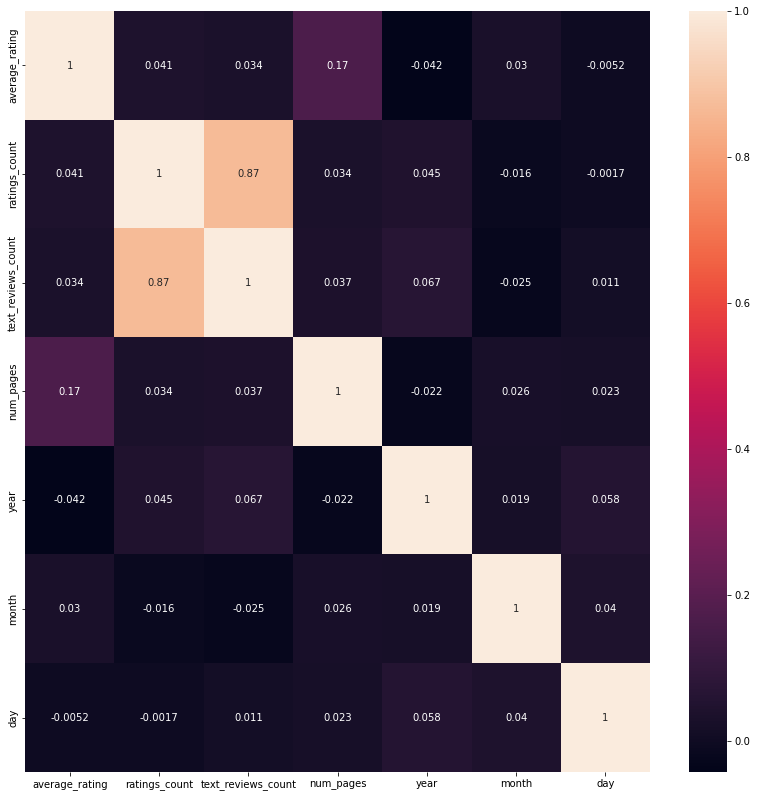

In [255]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation,annot=True)
plt.show()

## 1. Classification way

#### In this part, we want to predict in which group a book will be

### Exploratory Data Analysis

In [256]:
df_processed.head(5)

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publication_date,publisher,num_pages,year,month,day
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,2095690,27591,2006-09-16,Scholastic Inc.,652,2006,9,16
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,2153167,29221,2004-09-01,Scholastic Inc.,870,2004,9,1
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,2003-11-01,Scholastic,352,2003,11,1
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,2339585,36325,2004-05-01,Scholastic Inc.,435,2004,5,1
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,41428,164,2004-09-13,Scholastic,2690,2004,9,13


In [257]:
df_processed.describe()

,average_rating,ratings_count,text_reviews_count,num_pages,year,month,day
count,11046.000000,1.104600e+04,11046.00000,11046.000000,11046.000000,11046.000000,11046.000000
mean,3.943134,1.806794e+04,545.82772,336.762810,2000.185316,6.549611,11.257469
std,0.295213,1.128806e+05,2585.18629,240.971269,8.206710,3.413874,10.274079
min,1.000000,1.000000e+00,0.00000,0.000000,1900.000000,1.000000,1.000000
25%,3.780000,1.100000e+02,9.00000,194.000000,1998.000000,4.000000,1.000000
50%,3.960000,7.645000e+02,48.00000,300.000000,2003.000000,7.000000,8.000000
75%,4.140000,5.058750e+03,241.00000,416.000000,2005.000000,10.000000,20.000000
max,5.000000,4.597666e+06,94265.00000,6576.000000,2020.000000,12.000000,31.000000


In [258]:
group = []
for lines in df_processed.index.tolist() : 
        if df_processed.loc[lines, "average_rating"] < 4 : 
            group.append("Less Good")
        else : 
            group.append("Very good")

In [259]:
df_processed["rating_category"] = group

In [260]:
df_processed["rating_category"].value_counts()

Less Good    6118
Very good    4928
Name: rating_category, dtype: int64

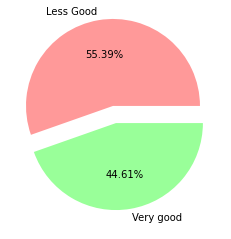

In [261]:
colors = ['#ff9999','#99ff99']
plt.pie(df_processed.rating_category.value_counts(), labels=df_processed.rating_category.value_counts().index,
        autopct='%1.2f%%',explode=[0.2,0], colors = colors)
plt.show()

### Features Engineering

In [262]:
df_processed = df_processed.drop(['title','authors', 'publication_date', 'publisher', 'day', 'month'], 1)

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [263]:
df_engineered = df_processed.copy()

# Remove outliers from language code
lang_occur = pd.DataFrame({'Count' : df_engineered.language_code.value_counts()})
for language in lang_occur.index : 
    if lang_occur.loc[ language ,'Count'] < 2 :
        index = df_engineered[df_engineered.loc[:,'language_code'] == language].index
        df_engineered = df_engineered.drop(index)

In [264]:
df_engineered.head(2)

,average_rating,language_code,ratings_count,text_reviews_count,num_pages,year,rating_category
bookID,,,,,,,
1,4.57,eng,2095690,27591,652,2006,Very good
2,4.49,eng,2153167,29221,870,2004,Very good


In [265]:
df_engineered.language_code.value_counts()

eng    10480
spa      212
fre      140
ger       96
jpn       45
mul       19
zho       14
por       10
grc        9
ita        5
lat        3
rus        2
swe        2
Name: language_code, dtype: int64

In [266]:
# Transform each language code into a column
df_ready = pd.concat([df_engineered,pd.get_dummies(df_engineered.language_code)],axis=1).drop(columns=["language_code", 'average_rating']) 
df_ready.head(2)

,ratings_count,text_reviews_count,num_pages,year,rating_category,eng,fre,ger,grc,ita,jpn,lat,mul,por,rus,spa,swe,zho
bookID,,,,,,,,,,,,,,,,,,
1,2095690,27591,652,2006,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2153167,29221,870,2004,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0


### Model selection and evaluation

#### Dataset splitting 1

In [267]:
df_train, df_test = train_test_split(df_ready, test_size = 0.15)## 15 % du jeu sevira pour le test

In [268]:
#Train data
X_train = df_train.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'year', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_train = df_train.rating_category.values

#Test data
X_test = df_test.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'year', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_test = df_test.rating_category.values

#### Logistic regression

In [269]:
lr_model = LogisticRegression(random_state=0,max_iter=1000, solver='liblinear')

# here we train the model on the training data
lr_model.fit(X=X_train, y=Y_train)

y_test_predicted = lr_model.predict(X_test)

# Confusion matrix
cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test,y_pred= y_test_predicted)
cf = cf/len(Y_test)

report_RL1 =classification_report(y_true=Y_test, y_pred=y_test_predicted)

In [270]:
cf

,y_test_Less_good,y_test_Good
y_pred_Less_good,0.491546,0.067633
y_pred_Good,0.356884,0.083937


In [271]:
print(report_RL1)

              precision    recall  f1-score   support

   Less Good       0.58      0.88      0.70       926
   Very good       0.55      0.19      0.28       730

    accuracy                           0.58      1656
   macro avg       0.57      0.53      0.49      1656
weighted avg       0.57      0.58      0.52      1656



### Attempts to improve outcomes

### By features engineering

#### Dataset splitting 2 : Evaluation without any language code

In [272]:
X_train_2 = df_train.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'year']].values
Y_train_2 = df_train.rating_category.values

# Test data
X_test_2 = df_test.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'year']].values
Y_test_2 = df_test.rating_category.values

#### Logistic regression 2 

In [273]:
# here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000, solver='liblinear')

# here we train the model on the training data
lr_model.fit(X=X_train_2, y=Y_train_2)
y_test_predicted_2 = lr_model.predict(X_test_2)

# Confusion matrix
cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test_2,y_pred= y_test_predicted_2)
cf = cf/len(Y_test_2)

report_RL2 =classification_report(y_true=Y_test_2, y_pred=y_test_predicted_2)

#### Dataset splitting 3 :  Evaluation without year

In [274]:
X_train_3 = df_train.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_train_3 = df_train.rating_category.values

#Test data
X_test_3 = df_test.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_test_3 = df_test.rating_category.values

#### Logistic regression 3 

In [275]:
# here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000, solver='liblinear')

# here we train the model on the training data
lr_model.fit(X=X_train_3, y=Y_train_3)
y_test_predicted_3 = lr_model.predict(X_test_3)

# Confusion matrix
cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test_3,y_pred= y_test_predicted_3)
cf = cf/len(Y_test_3)

report_RL3 =classification_report(y_true=Y_test_3, y_pred=y_test_predicted_3)

In [276]:
print("Report Logistic Regression with language_code and year")
print(report_RL1)
print("Report Logistic Regression without any language_code")
print(report_RL2)
print("Report Logistic Regression without year")
print(report_RL3)

Report Logistic Regression with language_code and year
              precision    recall  f1-score   support

   Less Good       0.58      0.88      0.70       926
   Very good       0.55      0.19      0.28       730

    accuracy                           0.58      1656
   macro avg       0.57      0.53      0.49      1656
weighted avg       0.57      0.58      0.52      1656

Report Logistic Regression without any language_code
              precision    recall  f1-score   support

   Less Good       0.58      0.88      0.70       926
   Very good       0.55      0.19      0.28       730

    accuracy                           0.58      1656
   macro avg       0.57      0.53      0.49      1656
weighted avg       0.57      0.58      0.52      1656

Report Logistic Regression without year
              precision    recall  f1-score   support

   Less Good       0.58      0.87      0.70       926
   Very good       0.56      0.21      0.30       730

    accuracy                      

In [277]:
len(Y_test_3)

1656

### By improving the dataset


We aren't satisfied of this repartition because we think that two groups is not enough to classify books. So we decided to enrich our dataset in order to have at least 3 almost balanced groups. We took data from https://github.com/kart-projects/Goodreads-books.

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:25: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



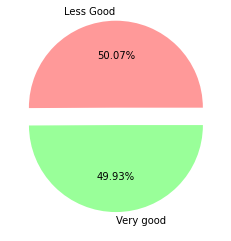

In [280]:
# Data loading
df_add = pd.read_csv(r"C:\Users\usout\OneDrive\Bureau\Work DSTI\Python_lab\Projet_Jason_NSIMBA\book2.csv", index_col = 'bookID')

# Data cleaning
df_add['num_pages'] = df_add['# num_pages']
df_add = df_add.drop(['isbn13', 'isbn', '# num_pages'],1)
df_add = df_add.drop(df_add[(df_add.ratings_count == 0)].index)
df_add = df_add[df_add.average_rating > 4]
df_add = df_add.drop(['title', 'authors'], 1)

for i in df_add.index : # for number in bookID
    if df_add.loc[i, 'language_code'] == 'en-US' or  df_add.loc[i, 'language_code'] == 'en-GB' or df_add.loc[i, 'language_code'] == 'en-CA' or df_add.loc[i, 'language_code'] == 'enm': # if the value is "en-US", "en-GB", "en-CA" 
        df_add.loc[i, 'language_code']= 'eng' # replace the value by "eng"

# Grouping         
group = []
for lines in df_add.index.tolist() : 
        if df_add.loc[lines, "average_rating"] < 4 : 
            group.append("Less Good")
        else : 
            group.append("Very good")
df_add['rating_category'] = group        
               
# New dataframe
df_processed = df_processed.drop(['year'], 1) 
df_rised = df_processed.copy()
for j in df_add.index.tolist() : 
    if j not in df_rised.index.tolist() : 
        df_rised = df_rised.append(df_add[df_add.index == j], ignore_index=False)
        

# Visualisation
colors = ['#ff9999','#99ff99']
plt.pie(df_rised.rating_category.value_counts(), labels=df_rised.rating_category.value_counts().index,
        autopct='%1.2f%%',explode=[0.2,0], colors = colors)
plt.show()

In [171]:
# remove book with less than 2 books in one language
lang_occur = pd.DataFrame({"Count" : df_rised.language_code.value_counts()})
for language in lang_occur.index : 
    if lang_occur.loc[ language ,'Count'] < 2 :
        index = df_rised[df_rised.loc[:,'language_code'] == language].index
        df_rised = df_rised.drop(index)
        
df_ready_rised = pd.concat([df_rised,pd.get_dummies(df_rised.language_code)],axis=1).drop(columns=["language_code", 'average_rating']) 

In [203]:
df_ready_rised.isna().sum()

ratings_count         0
text_reviews_count    0
num_pages             0
rating_category       0
eng                   0
fre                   0
ger                   0
grc                   0
ita                   0
jpn                   0
lat                   0
mul                   0
nl                    0
por                   0
rus                   0
spa                   0
swe                   0
tur                   0
zho                   0
dtype: int64

In [199]:
df_ready_rised

,ratings_count,text_reviews_count,num_pages,rating_category,eng,fre,ger,grc,ita,jpn,lat,mul,nl,por,rus,spa,swe,tur,zho
bookID,,,,,,,,,,,,,,,,,,,
1,2095690,27591,652,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2153167,29221,870,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6333,244,352,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2339585,36325,435,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,41428,164,2690,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47692,58,6,477,Very good,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
47693,8744,524,64,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47697,12775,34,180,Very good,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
df_ready_rised.describe()

,ratings_count,text_reviews_count,num_pages,eng,fre,ger,grc,ita,jpn,lat,mul,nl,por,rus,spa,swe,tur,zho
count,1.220900e+04,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000
mean,1.892167e+04,562.657548,345.471455,0.936932,0.013842,0.012122,0.000819,0.000901,0.005078,0.000246,0.001966,0.000164,0.001392,0.000491,0.024490,0.000164,0.000164,0.001229
std,1.224320e+05,2678.055636,258.526389,0.243096,0.116841,0.109436,0.028609,0.030004,0.071083,0.015674,0.044295,0.012798,0.037291,0.022164,0.154571,0.012798,0.012798,0.035031
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.010000e+02,9.000000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.140000e+02,45.000000,304.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.032000e+03,235.000000,425.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.629932e+06,94265.000000,6576.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dataset splitting 4 : With the enhanced dataset, and without year

In [173]:
df_train, df_test = train_test_split(df_ready_rised, test_size = 0.15) ## configuration for enhanced dataset

In [174]:
#Train data
X_train_bis = df_train.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_train_bis = df_train.rating_category.values

#Test data
X_test_bis = df_test.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages', 'eng', 'fre', 'ger',
                          'grc', 'ita', 'jpn', 'lat', 'mul', 'por', 'rus', 'spa', 'swe', 'zho']].values
Y_test_bis = df_test.rating_category.values


#### Logistic regression 4 

In [175]:
# here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000, solver='liblinear')

# here we train the model on the training data
lr_model.fit(X=X_train_bis, y=Y_train_bis)

y_test_predicted_bis = lr_model.predict(X_test_bis)

# Confusion matrix
cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test_bis,y_pred= y_test_predicted_bis)
cf = cf/len(Y_test_bis)

report_RL1_rised =classification_report(y_true=Y_test_bis, y_pred=y_test_predicted_bis)

In [176]:
cf

,y_test_Less_good,y_test_Good
y_pred_Less_good,0.002729,0.492358
y_pred_Good,0.004913,0.5


In [177]:
print("Report Logistic Regression with the first dataset without year")
print(report_RL3)
print("Report Logistic Regression with the enhanced dataset (without year)")
print(report_RL1_rised)

Report Logistic Regression with the first dataset without year
              precision    recall  f1-score   support

   Less Good       0.60      0.85      0.71       965
   Very good       0.52      0.22      0.31       691

    accuracy                           0.59      1656
   macro avg       0.56      0.54      0.51      1656
weighted avg       0.57      0.59      0.54      1656

Report Logistic Regression with the enhanced dataset (without year)
              precision    recall  f1-score   support

   Less Good       0.36      0.01      0.01       907
   Very good       0.50      0.99      0.67       925

    accuracy                           0.50      1832
   macro avg       0.43      0.50      0.34      1832
weighted avg       0.43      0.50      0.34      1832



### By changing the model

#### Decision Tree : With the first dataset (before enhancement)

In [178]:
df_train, df_test = train_test_split(df_ready, test_size = 0.15) ## original configuration

In [179]:
# here we initialize the model
dt_no_model = DecisionTreeClassifier()

# here we train the model on the training data
dt_no_model.fit(X=X_train, y=Y_train)

y_test_predicted_dt = dt_no_model.predict(X_test)

# Confusion matrix
cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test,y_pred= y_test_predicted_dt)
cf = cf/len(Y_test)

report_DT =classification_report(y_true=Y_test, y_pred=y_test_predicted_dt)

#### Random Forest : With the first dataset (before enhancement)

In [180]:
# here we initialize the model
rf_model = RandomForestClassifier()

# here we train the model on the training data
rf_model.fit(X=X_train, y=Y_train)

y_test_predicted_rf = rf_model.predict(X_test)

cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test, y_pred= y_test_predicted_rf)
cf = cf/len(Y_test)

report_RF =classification_report(y_true=Y_test, y_pred=y_test_predicted_rf)

In [181]:
print('\nComparison of different model with the first dataset (before enhancement) \n')
print('Random Forest is the best model \n')
print("Report Logistic Regression with the first dataset")
print(report_RL1)
print("Report Decision tree with the first dataset")
print(report_DT)
print("Report Random Forest with the first dataset")
print(report_RF)


Comparison of different model with the first dataset (before enhancement) 

Random Forest is the best model 

Report Logistic Regression with the first dataset
              precision    recall  f1-score   support

   Less Good       0.60      0.87      0.71       965
   Very good       0.53      0.21      0.30       691

    accuracy                           0.59      1656
   macro avg       0.57      0.54      0.50      1656
weighted avg       0.57      0.59      0.54      1656

Report Decision tree with the first dataset
              precision    recall  f1-score   support

   Less Good       0.61      0.59      0.60       965
   Very good       0.45      0.47      0.46       691

    accuracy                           0.54      1656
   macro avg       0.53      0.53      0.53      1656
weighted avg       0.55      0.54      0.54      1656

Report Random Forest with the first dataset
              precision    recall  f1-score   support

   Less Good       0.64      0.71      0.6

#### Random Forest : With the enhanced dataset

In [182]:
df_train, df_test = train_test_split(df_ready_rised, test_size = 0.15) ## configuration for enhanced dataset

In [183]:
# here we initialize the model
rf_model = RandomForestClassifier()

# here we train the model on the training data
rf_model.fit(X=X_train_bis, y=Y_train_bis)

y_test_predicted_bis_rf = rf_model.predict(X_test_bis)

cf = pd.DataFrame(
    columns=["y_test_Less_good","y_test_Good"],index=["y_pred_Less_good","y_pred_Good"]
)

cf.loc[:,:] =  confusion_matrix(y_true= Y_test_bis, y_pred= y_test_predicted_bis_rf)
cf/len(Y_test_bis)

report_RF_2 =classification_report(y_true=Y_test_bis, y_pred=y_test_predicted_bis_rf)

In [184]:
print('\nComparison of Random Forest model with the first and the enhanced dataset \n')
print("Report Random Forest with the first dataset")
print(report_RF)
print("Report Random Forest with the rised dataset")
print(report_RF_2)


Comparison of Random Forest model with the first and the enhanced dataset 

Report Random Forest with the first dataset
              precision    recall  f1-score   support

   Less Good       0.64      0.71      0.67       965
   Very good       0.52      0.44      0.47       691

    accuracy                           0.60      1656
   macro avg       0.58      0.57      0.57      1656
weighted avg       0.59      0.60      0.59      1656

Report Random Forest with the rised dataset
              precision    recall  f1-score   support

   Less Good       0.59      0.63      0.61       907
   Very good       0.61      0.57      0.59       925

    accuracy                           0.60      1832
   macro avg       0.60      0.60      0.60      1832
weighted avg       0.60      0.60      0.60      1832



##### The best model is the Random Forest with the rised dataset

## 2. Regression way

#### In this part, we want to predict the value of average_rating

We reloaded the enhanced dataset

In [185]:
df_regr = df_processed.copy()
df_regr = df_regr.drop(['rating_category'], 1)

# Data loading
df_add = pd.read_csv(r"C:\Users\usout\OneDrive\Bureau\Work DSTI\Python_lab\Projet_Jason_NSIMBA\book2.csv", index_col = 'bookID')

# Data cleaning
df_add['num_pages'] = df_add['# num_pages']
df_add = df_add.drop(['isbn13', 'isbn', '# num_pages'],1)
df_add = df_add.drop(df_add[(df_add.ratings_count == 0)].index)
df_add = df_add[df_add.average_rating > 4]
df_add = df_add.drop(['title', 'authors'], 1)

for i in df_add.index : # for number in bookID
    if df_add.loc[i, 'language_code'] == 'en-US' or df_add.loc[i, 'language_code'] == 'en-GB' or df_add.loc[i, 'language_code'] == 'en-CA' or df_add.loc[i, 'language_code'] == 'enm' :  
        df_add.loc[i, 'language_code']= 'eng' # replace the value by "eng"
        
# Data enhancement        
for j in df_add.index.tolist() : 
    if j not in df_regr.index.tolist() : 
        df_regr = df_regr.append(df_add[df_add.index == j], ignore_index=False)

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [186]:
# Data cleaning 2 

# remove book with less than 2 books in one language
lang_occur = pd.DataFrame({"Count" : df_regr.language_code.value_counts()})
for language in lang_occur.index : 
    if lang_occur.loc[ language ,'Count'] < 2 :
        index = df_regr[df_regr.loc[:,'language_code'] == language].index
        df_regr = df_regr.drop(index)
        
# remove the language_code variable
df_regr = df_regr.drop(['language_code'], 1)

C:\Users\usout\anaconda3\envs\python_lab\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [187]:
df_regr.describe()

,average_rating,ratings_count,text_reviews_count,num_pages
count,12209.000000,1.220900e+04,12209.000000,12209.000000
mean,3.968046,1.892167e+04,562.657548,345.471455
std,0.294887,1.224320e+05,2678.055636,258.526389
min,1.000000,1.000000e+00,0.000000,0.000000
25%,3.800000,1.010000e+02,9.000000,196.000000
50%,3.990000,7.140000e+02,45.000000,304.000000
75%,4.160000,5.032000e+03,235.000000,425.000000
max,5.000000,5.629932e+06,94265.000000,6576.000000


In [188]:
df_regr.head(5)

,average_rating,ratings_count,text_reviews_count,num_pages
bookID,,,,
1,4.57,2095690,27591,652
2,4.49,2153167,29221,870
4,4.42,6333,244,352
5,4.56,2339585,36325,435
8,4.78,41428,164,2690


### Model selection and evaluation

#### Dataset splitting 1

In [189]:
df_train, df_test = train_test_split(df_regr, test_size = 0.15) ## configuration for enhanced dataset

In [190]:
X_train = df_train.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages']].values
Y_train = df_train.average_rating.values
X_test = df_test.loc[:, ['ratings_count', 'text_reviews_count', 'num_pages']].values
Y_test = df_test.average_rating.values

#### Linear regression 

In [191]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train,y=Y_train)
y_test_pred = linear_regression.predict(X_test)

In [192]:
MAE = mean_absolute_error(y_pred=y_test_pred, y_true=Y_test)
ME = max_error(y_pred=y_test_pred, y_true=Y_test)
EVS = explained_variance_score(y_pred=y_test_pred, y_true=Y_test)
R2 = r2_score(y_pred=y_test_pred, y_true=Y_test)

In [193]:
print("Linear regression \n")
print("Mean absolute error : %.2f" % MAE)
print("Maximum residual error : %.2f" % ME)
print("Explained variance regression score : %.2f" % EVS)
print("Coefficient of determination (R²) : %.2f" % R2 )

Linear regression 

Mean absolute error : 0.22
Maximum residual error : 1.28
Explained variance regression score : 0.04
Coefficient of determination (R²) : 0.03


In [194]:
fig = make_subplots(rows=2, cols=2)

# Ratings_count
fig.add_trace(
    go.Scatter(x=X_test[:,0], y=Y_test,
    mode="markers"), 
    row=1, col=1
) 

# Text_reviews_count
fig.add_trace(
    go.Scatter(x=X_test[:,1], y=Y_test,
    mode="markers"),
    row=1, col=2
)

# Num_pages
fig.add_trace(
    go.Scatter(x=X_test[:,2], y=Y_test,
    mode="markers"),
    row=2, col=1
)


fig.update_layout(height=600, width=800, title_text="Ratings count, text reviews count and number of pages in function of average rating")
fig.show()